# Single label multiclass -  Image Classification - Flowers Recognition

- Dataset Description
  - This dataset contains 4242 images of flowers
  - The data collection is based on the data flicr, google images, yandex images
  - You can use this datastet to recognize plants from the photo.
- Data
  - https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing
- Attribute Information
  - The pictures are divided into five classes
    - chamomile
    - tulip
    - rose
    - sunflower
    - dandelion
  - For each class there are about 800 photos. 
  - Photos are not high resolution, about 320x240 pixels
- Also explore how to resize images in tensorflow and then resize all the images to a same size
- This is a Multiclass Classification Problem.<br>

- WORKFLOW
  - Load Data 
  - Split into 60 and 40 ratio.
  - Encode labels.
  - Create Model
  - Compilation Step 
    - Its a Multiclass Classification problem , select loss , metrics according to it
  - Train the Model.
    - If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need
  - Evaluation Step
  - Prediction
    - Prediction should be > 85%

## Solution

In [33]:
# imports
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
# sklearn for data pre-processing
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

### Load Data

In [2]:
# mount google drive so data can be assessed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# path of folder with datasets
base_path = "/content/drive/MyDrive/DL_datasets/"
# path of folder with dataset of this project
data_path = "single_label_multiclass-image_classification-Flowers_Recognition/"
# folder containing images directories
dir_name = "flowers"
# complete path to directory
dir_path = Path(base_path+data_path+dir_name)

In [4]:
# read images and labels and append into some lists

# define empty list
labels = []
features = []

# loop over directories in the parent folder
for dir in dir_path.iterdir():
  print(dir.name)
  # loop over images in each sub directory
  for imgpath in dir.iterdir():
    # check if the entry is a "jpg" image
    if imgpath.name.endswith("jpg"):
      # read image and change it to grey scale
      imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      # resize all images to (150,150)
      imgarr = cv2.resize(imgarr, (150,150))
      # append data to lists
      labels.append(dir.name)
      features.append(imgarr)

sunflower
tulip
daisy
rose
dandelion


In [5]:
# convert list into an ndarray and check shape
flower_data = np.asarray(features)
print(flower_data.shape)
flower_labels = np.asarray(labels)
print(flower_labels.shape)

(4333, 150, 150)
(4333,)


In [6]:
# shuffle data to remove patterns
flower_data, flower_labels = utils.shuffle(flower_data, flower_labels)

### Encode labels

- now we have features and labels but before splitting it in the train and test first encode labels. So they are in numeric form

In [7]:
print("original labels : ")
print(flower_labels)

# find unique labels and index of their first occurance
temp = {}
original_labels = np.unique(flower_labels)
for i in original_labels:
  temp[np.where(flower_labels == i)[0][0] ] = i

# encode labels to numeric form
labelEncoder = preprocessing.LabelEncoder()
flower_labels = labelEncoder.fit_transform(flower_labels)

print("encoded labels : ")
print(flower_labels)

# a dict of labels and incoded values
original_encoded_labels = {}
for k,v in temp.items():
  original_encoded_labels[flower_labels[k]] = v

# Encoded label and original label
print("Encoded label and original label : ")
print(original_encoded_labels)

original labels : 
['daisy' 'daisy' 'sunflower' ... 'sunflower' 'rose' 'rose']
encoded labels : 
[0 0 3 ... 3 2 2]
Encoded label and original label : 
{0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}


### Split into 60 and 40 ratio.

In [8]:
# split data in 60% training and 40 % testing data
# data seams to be too less so rater than 60/40 split
# split data to 90/10
train_images, test_images, train_labels, test_labels = train_test_split(flower_data, flower_labels, test_size=0.1, random_state=1)

In [9]:
# training data
print("Shape of training images : ",train_images.shape)
print("Shape of training images labels : ",train_labels.shape)

Shape of training images :  (3899, 150, 150)
Shape of training images labels :  (3899,)


In [10]:
# testing data
print("Shape of test images : ",test_images.shape)
print("Shape of test images labels : ",test_labels.shape)

Shape of test images :  (434, 150, 150)
Shape of test images labels :  (434,)


Original Label :  rose
Encoded Label :  2


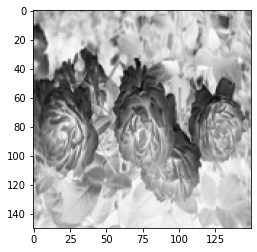



Original Label :  dandelion
Encoded Label :  1


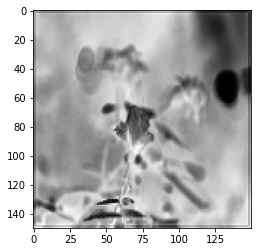

In [12]:
# A little visulization of the data in traiing and test set

# training set
flower = train_images[5]
plt.imshow(flower, cmap=plt.cm.binary)
print("Original Label : ",original_encoded_labels[train_labels[5]])
print("Encoded Label : ",train_labels[5])
plt.show()

print("\n")

# test set
flower = test_images[5]
plt.imshow(flower, cmap=plt.cm.binary)
print("Original Label : ",original_encoded_labels[test_labels[21]])
print("Encoded Label : ",test_labels[21])
plt.show()

- before creating the model we first normlize the data
- normalization is done before model creating as we are going to use Dense layers and then multiple models are to be trained

In [13]:
# Preparing the image data
# We need to reshape our data as it is of shape (3899,150,150) for training set and (434,150,150) for test set
# on the other hand we need to use this data as initial nodes
# thus data is reshaped to (3899,150*150) and (434,150*150)
train_images = train_images.reshape((3899, 150 * 150))
test_images = test_images.reshape((434, 150 * 150))
# Initally values are between interval [0,225]
# scale them to be in interval [0,1]
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

---

### Create Model

In [20]:
# Define network and layers
model = keras.Sequential([
    layers.Dense(1024,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(5,activation="softmax")
])

### Compilation Step
- Multiclass Classification problem
  - select loss , metrics according to it

In [21]:
model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

### Train the Model.
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need

In [22]:
# split traing data in 80% train and 20% validation
partial_train_images, val_images, partial_train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)
history = model.fit(
    partial_train_images, 
    partial_train_labels,
    validation_data=(val_images, val_labels),
    epochs=10,  
    batch_size=15,
    verbose=1)

Epoch 1/10
208/208 [==============================] - 3s 13ms/step - loss: 4.4223 - accuracy: 0.2199 - val_loss: 1.6406 - val_accuracy: 0.1833
Epoch 2/10
208/208 [==============================] - 3s 12ms/step - loss: 1.6302 - accuracy: 0.2552 - val_loss: 1.5618 - val_accuracy: 0.2436
Epoch 3/10
208/208 [==============================] - 3s 12ms/step - loss: 1.5965 - accuracy: 0.2635 - val_loss: 1.5690 - val_accuracy: 0.2795
Epoch 4/10
208/208 [==============================] - 3s 13ms/step - loss: 1.5695 - accuracy: 0.2873 - val_loss: 1.5685 - val_accuracy: 0.2910
Epoch 5/10
208/208 [==============================] - 3s 12ms/step - loss: 1.5584 - accuracy: 0.2918 - val_loss: 1.5705 - val_accuracy: 0.2628
Epoch 6/10
208/208 [==============================] - 3s 12ms/step - loss: 1.5572 - accuracy: 0.2748 - val_loss: 1.5275 - val_accuracy: 0.2744
Epoch 7/10
208/208 [==============================] - 3s 12ms/step - loss: 1.5362 - accuracy: 0.2937 - val_loss: 1.5411 - val_accuracy: 0.2833

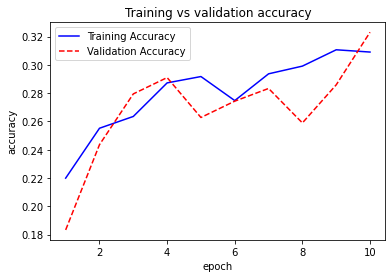

In [23]:
# plotting test results
sample = range(1, len(history.history["accuracy"])+1)
plt.plot(sample, history.history["accuracy"], "b-", label="Training Accuracy",color='blue')
plt.plot(sample, history.history["val_accuracy"], "b--", label="Validation Accuracy",color='red')
plt.title("Training vs validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

- the model never go the state of over fitting lets repeat process again to over fit the model

### Define, compile and train (K fold Validation + epoch + layers)

Processing fold #0
Epoch 1/10
195/195 [==============================] - 2s 8ms/step - loss: 5.5058 - accuracy: 0.2410 - val_loss: 1.6319 - val_accuracy: 0.2464
Epoch 2/10
195/195 [==============================] - 1s 7ms/step - loss: 1.6518 - accuracy: 0.2619 - val_loss: 1.6002 - val_accuracy: 0.2659
Epoch 3/10
195/195 [==============================] - 1s 7ms/step - loss: 1.6270 - accuracy: 0.2725 - val_loss: 1.5503 - val_accuracy: 0.2926
Epoch 4/10
195/195 [==============================] - 1s 7ms/step - loss: 1.6025 - accuracy: 0.2776 - val_loss: 1.5333 - val_accuracy: 0.3203
Epoch 5/10
195/195 [==============================] - 1s 7ms/step - loss: 1.5702 - accuracy: 0.2786 - val_loss: 1.5578 - val_accuracy: 0.2885
Epoch 6/10
195/195 [==============================] - 1s 7ms/step - loss: 1.5910 - accuracy: 0.2814 - val_loss: 1.5732 - val_accuracy: 0.2864
Epoch 7/10
195/195 [==============================] - 1s 7ms/step - loss: 1.5638 - accuracy: 0.2862 - val_loss: 1.5421 - val_accu

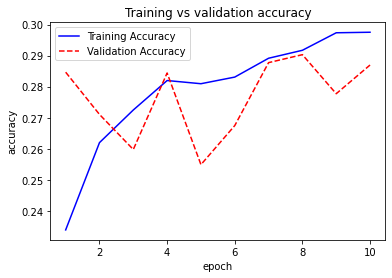

In [31]:
# build model again with the same parameters as above
def build_model():
  model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(5,activation="softmax")
  ])
  model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
  )
  return model

# K Fold validation
# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_images) // k
# number of epochs
num_epochs = 10
# a list to store history on each fold
all_tra_histories = []
all_val_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")
    # select validation data during each fold
    val_data = train_images[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_images[:i * num_val_samples],
         train_images[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    # build model based on defined function
    model = build_model()
    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        batch_size=15,
        verbose=1)
    # get final score and append to list
    tra_history = history.history["accuracy"]
    val_history = history.history["val_accuracy"]
    all_tra_histories.append(tra_history)
    all_val_histories.append(val_history)

# Building the history of successive mean K-fold validation scores
average_tra_history = [np.mean([x[i] for x in all_tra_histories]) for i in range(num_epochs)]
average_val_history = [np.mean([x[i] for x in all_val_histories]) for i in range(num_epochs)]

# plotting test results
sample = range(1, len(average_tra_history)+1)
plt.plot(sample, average_tra_history, "b-", label="Training Accuracy",color='blue')
plt.plot(sample, average_val_history, "b--", label="Validation Accuracy",color='red')
plt.title("Training vs validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

### with out kfold

Epoch 1/20
208/208 [==============================] - 3s 13ms/step - loss: 5.3046 - accuracy: 0.2215 - val_loss: 1.5697 - val_accuracy: 0.3051
Epoch 2/20
208/208 [==============================] - 3s 12ms/step - loss: 1.6123 - accuracy: 0.2783 - val_loss: 1.5688 - val_accuracy: 0.2615
Epoch 3/20
208/208 [==============================] - 3s 12ms/step - loss: 1.5717 - accuracy: 0.2828 - val_loss: 1.6683 - val_accuracy: 0.2487
Epoch 4/20
208/208 [==============================] - 3s 12ms/step - loss: 1.5693 - accuracy: 0.2969 - val_loss: 1.5433 - val_accuracy: 0.3026
Epoch 5/20
208/208 [==============================] - 3s 12ms/step - loss: 1.5457 - accuracy: 0.2927 - val_loss: 1.5329 - val_accuracy: 0.3179
Epoch 6/20
208/208 [==============================] - 3s 13ms/step - loss: 1.5410 - accuracy: 0.3043 - val_loss: 1.5913 - val_accuracy: 0.2910
Epoch 7/20
208/208 [==============================] - 3s 12ms/step - loss: 1.5614 - accuracy: 0.3142 - val_loss: 1.5507 - val_accuracy: 0.2949

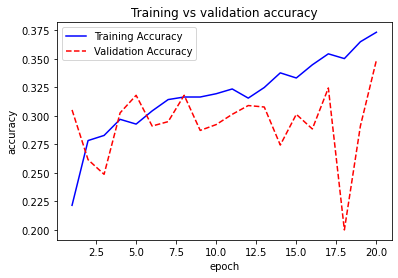

In [35]:
# Define network and layers
model = keras.Sequential([
    layers.Dense(1024,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(5,activation="softmax")
  ])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
# split traing data in 80% train and 20% validation
partial_train_images, val_images, partial_train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)
history = model.fit(
    partial_train_images, 
    partial_train_labels,
    validation_data=(val_images, val_labels),
    epochs=20,  
    batch_size=15,
    verbose=1)
# plotting test results
sample = range(1, len(history.history["accuracy"])+1)
plt.plot(sample, history.history["accuracy"], "b-", label="Training Accuracy",color='blue')
plt.plot(sample, history.history["val_accuracy"], "b--", label="Validation Accuracy",color='red')
plt.title("Training vs validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

### With regularization

Epoch 1/20
208/208 [==============================] - 5s 20ms/step - loss: 12.3244 - accuracy: 0.2055 - val_loss: 2.1290 - val_accuracy: 0.2167
Epoch 2/20
208/208 [==============================] - 4s 18ms/step - loss: 1.8465 - accuracy: 0.2299 - val_loss: 1.7101 - val_accuracy: 0.2231
Epoch 3/20
208/208 [==============================] - 4s 17ms/step - loss: 1.8183 - accuracy: 0.2270 - val_loss: 1.6264 - val_accuracy: 0.2654
Epoch 4/20
208/208 [==============================] - 4s 17ms/step - loss: 1.8999 - accuracy: 0.2321 - val_loss: 1.6117 - val_accuracy: 0.2654
Epoch 5/20
208/208 [==============================] - 4s 17ms/step - loss: 1.7636 - accuracy: 0.2267 - val_loss: 1.6186 - val_accuracy: 0.2167
Epoch 6/20
208/208 [==============================] - 4s 17ms/step - loss: 1.7566 - accuracy: 0.2299 - val_loss: 1.7055 - val_accuracy: 0.2769
Epoch 7/20
208/208 [==============================] - 4s 17ms/step - loss: 1.7494 - accuracy: 0.2260 - val_loss: 1.8629 - val_accuracy: 0.265

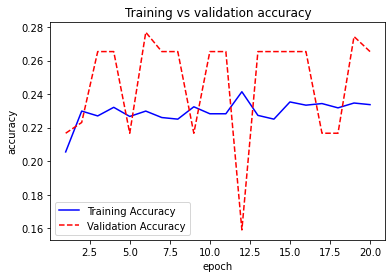

In [36]:
# Define network and layers
model = keras.Sequential([
    layers.Dense(1024,activation="relu",kernel_regularizer=regularizers.l2(0.02)),
    layers.Dense(512,activation="relu",kernel_regularizer=regularizers.l2(0.02)),
    layers.Dense(512,activation="relu",kernel_regularizer=regularizers.l2(0.02)),
    layers.Dense(5,activation="softmax")
  ])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
# split traing data in 80% train and 20% validation
partial_train_images, val_images, partial_train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)
history = model.fit(
    partial_train_images, 
    partial_train_labels,
    validation_data=(val_images, val_labels),
    epochs=20,  
    batch_size=15,
    verbose=1)
# plotting test results
sample = range(1, len(history.history["accuracy"])+1)
plt.plot(sample, history.history["accuracy"], "b-", label="Training Accuracy",color='blue')
plt.plot(sample, history.history["val_accuracy"], "b--", label="Validation Accuracy",color='red')
plt.title("Training vs validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

### With dropout

Epoch 1/100
208/208 [==============================] - 3s 13ms/step - loss: 5.1115 - accuracy: 0.2401 - val_loss: 1.5527 - val_accuracy: 0.2679
Epoch 2/100
208/208 [==============================] - 3s 13ms/step - loss: 1.6204 - accuracy: 0.2728 - val_loss: 1.6633 - val_accuracy: 0.2667
Epoch 3/100
208/208 [==============================] - 3s 12ms/step - loss: 1.5871 - accuracy: 0.2684 - val_loss: 1.5547 - val_accuracy: 0.2833
Epoch 4/100
208/208 [==============================] - 3s 12ms/step - loss: 1.5608 - accuracy: 0.2898 - val_loss: 1.5313 - val_accuracy: 0.3000
Epoch 5/100
208/208 [==============================] - 3s 13ms/step - loss: 1.5817 - accuracy: 0.2809 - val_loss: 1.5835 - val_accuracy: 0.2397
Epoch 6/100
208/208 [==============================] - 3s 13ms/step - loss: 1.5571 - accuracy: 0.2863 - val_loss: 1.5444 - val_accuracy: 0.2872
Epoch 7/100
208/208 [==============================] - 3s 12ms/step - loss: 1.5434 - accuracy: 0.3017 - val_loss: 1.5169 - val_accuracy:

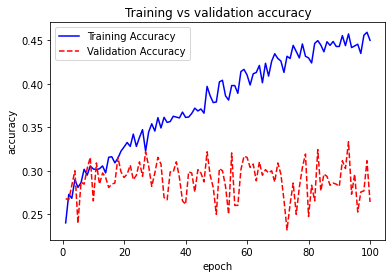

In [42]:
# Define network and layers
model = keras.Sequential([
    layers.Dense(1024,activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(5,activation="softmax")
  ])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
# split traing data in 80% train and 20% validation
partial_train_images, val_images, partial_train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)
history = model.fit(
    partial_train_images, 
    partial_train_labels,
    validation_data=(val_images, val_labels),
    epochs=100,  
    batch_size=15,
    verbose=1)
# plotting test results
sample = range(1, len(history.history["accuracy"])+1)
plt.plot(sample, history.history["accuracy"], "b-", label="Training Accuracy",color='blue')
plt.plot(sample, history.history["val_accuracy"], "b--", label="Validation Accuracy",color='red')
plt.title("Training vs validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

- models seams to overfitt around 27th epoch

### final model

In [43]:
# Define final model
model = keras.Sequential([
    layers.Dense(1024,activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(5,activation="softmax")
  ])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(
    train_images, 
    train_labels,
    epochs=26,  
    batch_size=15,
    verbose=1)

Epoch 1/26
260/260 [==============================] - 4s 12ms/step - loss: 3.7529 - accuracy: 0.2265
Epoch 2/26
260/260 [==============================] - 3s 12ms/step - loss: 1.6099 - accuracy: 0.2626
Epoch 3/26
260/260 [==============================] - 3s 12ms/step - loss: 1.5837 - accuracy: 0.2749
Epoch 4/26
260/260 [==============================] - 3s 12ms/step - loss: 1.5641 - accuracy: 0.2819
Epoch 5/26
260/260 [==============================] - 3s 12ms/step - loss: 1.5600 - accuracy: 0.2834
Epoch 6/26
260/260 [==============================] - 3s 12ms/step - loss: 1.5489 - accuracy: 0.3008
Epoch 7/26
260/260 [==============================] - 3s 12ms/step - loss: 1.5451 - accuracy: 0.3019
Epoch 8/26
260/260 [==============================] - 3s 12ms/step - loss: 1.5317 - accuracy: 0.3080
Epoch 9/26
260/260 [==============================] - 3s 12ms/step - loss: 1.5446 - accuracy: 0.2998
Epoch 10/26
260/260 [==============================] - 3s 12ms/step - loss: 1.5359 - accura

### Prediction

In [46]:
# Take first 10 images from the test images
test_image = test_images[0:10]
# predict the model behaviour on the slice of test images
predictions = model.predict(test_image)
# check predictio of first test digit
print(np.shape(predictions[0]))
# Each prdiction is probability of ten classes
predictions[0]

(5,)


array([0.1938467 , 0.26192194, 0.18982288, 0.11794424, 0.23646423],
      dtype=float32)

In [47]:
# find index of the higest probability which crosponds to the same label as index
predictions[0].argmax()

1

In [48]:
# higest probability
predictions[0][predictions[0].argmax()]

0.26192194

In [50]:
# Check the label from the test tabels
print(test_labels[0],original_encoded_labels[test_labels[0]])

0 daisy


### Evaluation Step

In [51]:
# Evaluating the model on new data

# compute average accuracy over the entire test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

14/14 [==============================] - 0s 4ms/step - loss: 1.5348 - accuracy: 0.3180
test_acc: 0.3179723620414734
test_loss: 1.5347720384597778


### END